# **Covid dashboard with mercury**

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
covid = pd.read_csv("CovidFaelle_Altersgruppe.csv", sep = ';')

# without AUT (whole country)
covid_wo_aut = covid.loc[covid['Bundesland'] != "Österreich"]

In [3]:
state = ['Wien',
            'Niederösterreich',
            'Oberösterreich',
            'Burgenland', 
            'Steiermark',
            'Salzburg',
            'Kärnten',
            'Tirol', 'Vorarlberg']
male = False
female = True
celsius = 0

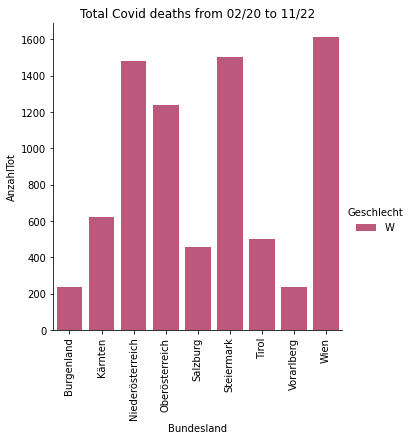

In [4]:
# Death count per state (absolute)

df_copy = covid_wo_aut.copy()

bundesland_sum_time = df_copy.groupby(by = ["Time", "Bundesland", "Geschlecht"], as_index = False).sum()
df = bundesland_sum_time[17892:17910][['Bundesland', 'AnzahlTot', 'Geschlecht']]
isin_state = df.Bundesland.isin(state)
df = df[isin_state]

if male == True and female == False:
    df = df[df['Geschlecht'] == 'M']

if male == False and female == True:
    df = df[df['Geschlecht'] == 'W']

ax = sns.catplot(x = "Bundesland",
                    kind = "bar",
                    y = "AnzahlTot",
                    hue = "Geschlecht",
                    data = df,
                    palette = "plasma").set(title = 'Total Covid deaths from 02/20 to 11/22')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
h3 = (covid_wo_aut
                    .filter(['Altersgruppe','AnzahlTot'])
                    .groupby('Altersgruppe')
                    .agg('sum')
                    .sort_values(['AnzahlTot'], ascending = False)
                    .reset_index()
                    )

plt.figure(figsize=(20,10))
plt.style.use('seaborn-darkgrid')
sns.barplot(data = h3
             ,x = 'AnzahlTot'
             ,y = 'Altersgruppe'
             ).set_title('deaths per age group', fontsize=20)

plt.show()